<a href="https://colab.research.google.com/github/Edersao/Curso_Data_Scientist/blob/main/estructura_datos_tipode_gr%C3%A1ficas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Lectura de datos birth y death, que
almacenan, por país, las tasas brutas de natalidad y mortalidad desde 1960. La tasa bruta de
natalidad indica el número de nacidos vivos que se producen durante el año, por cada 1.000
habitantes. Análogamente se define la de mortalidad.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [140]:
birth=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datos/visualizacion/1698424162537-Birth.csv')
death=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datos/visualizacion/1698424155860-Death.csv')
print(birth.head(),death.head(),sep='\n')

  Country Name Country Code    1960    1961    1962    1963    1964    1965  \
0        Aruba          ABW  35.679  34.529  33.320  32.050  30.737  29.413   
1  Afghanistan          AFG  51.279  51.373  51.457  51.530  51.589  51.631   
2       Angola          AGO  49.080  48.779  48.547  48.430  48.450  48.622   
3      Albania          ALB  40.924  40.368  39.627  38.723  37.695  36.599   
4      Andorra          AND     NaN     NaN     NaN     NaN     NaN     NaN   

     1966    1967  ...    2009    2010    2011    2012    2013    2014  \
0  28.121  26.908  ...  11.361  11.214  11.123  11.090  11.111  11.179   
1  51.652  51.650  ...  40.903  39.829  38.750  37.690  36.670  35.706   
2  48.936  49.343  ...  46.143  45.656  45.102  44.493  43.847  43.182   
3  35.496  34.435  ...  11.945  12.001  12.100  12.197  12.257  12.259   
4     NaN     NaN  ...   9.900   9.800     NaN   9.500     NaN     NaN   

     2015    2016    2017    2018  
0  11.281  11.404  11.532  11.652  
1  34.80

Obteniendo datos solo de México

In [34]:
# selección de datos anuales de Mexico
birth_M= birth.loc[birth['Country Name'] == 'Mexico']
death_M=death.loc[death['Country Name'] == 'Mexico']
#borramos columnas que se requieren
birth_M.drop(['Country Code','Country Name'],axis=1,inplace=True)
death_M.drop(['Country Code','Country Name'],axis=1,inplace=True)
# hacemos la transpuesta  para tener indice de años
birth_M, death_M= birth_M.T, death_M.T
birth_M.index.name, death_M.index.name='Years','Years'
birth_M.columns.name, death_M.columns.name= '',''
birth_M.rename(columns={152:'Birth'},inplace=True), death_M.rename(columns={152:'Deaths'},inplace=True)
# juntamos dataframe
mexico=pd.merge(left=birth_M,right=death_M,left_on='Years',right_on='Years')
mexico.head()

<ipython-input-34-20b75335ae37>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birth_M.drop(['Country Code','Country Name'],axis=1,inplace=True)
<ipython-input-34-20b75335ae37>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death_M.drop(['Country Code','Country Name'],axis=1,inplace=True)


,Birth,Deaths
Years,,
1960,45.179,12.270
1961,44.919,11.915
1962,44.698,11.610
1963,44.517,11.346
1964,44.366,11.114


Text(0.5, 0, '')

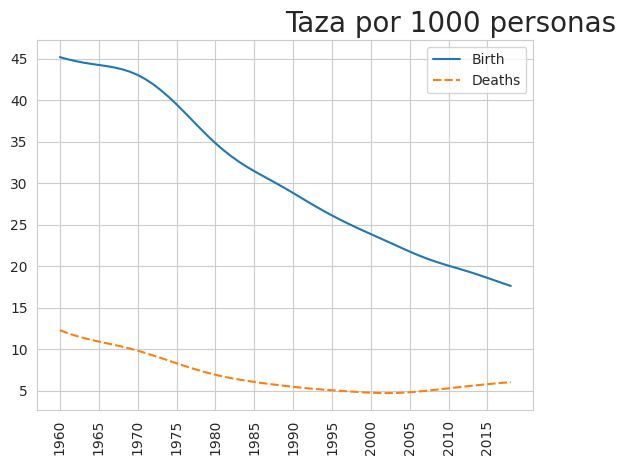

In [42]:
sns.set_style('whitegrid')
sns.lineplot(data=mexico)
plt.xticks(np.arange(0,len(mexico+1),5))
plt.xticks(rotation=90)
plt.title('Taza por 1000 personas',fontsize=20, horizontalalignment='left')
plt.xlabel('',fontsize=20)

De los datos death determinar los tres países con la tasa de mortalidad más alta en el 2018. Graficar esos países junto con Mexico y otro país de elección.

In [129]:
death.index=death['Country Name']
death_18=death['2018']#.sort_values(by='2018',ascending=False)
death_18=death_18.sort_values(ascending=False)
death5=death_18.loc[(death_18.index == death_18.index[0]) | (death_18.index == death_18.index[1]) | (death_18.index == death_18.index[2]) | (death_18.index == 'Mexico') | (death_18.index == death_18.loc[death_18 == min(death_18)].index[0])]
# otra manera
#death.sort_values('2018',inplace=True)
#death.dropna(axis=0,subset=['2018'],inplace=True)
#sample = pd.concat([death[death['Country Name']=='Mexico'],death[death['Country Name']=='United States'],death[-3:]])
#sample.plot(kind='barh',x='Country Name',y='2018',title='Death rate 2018')

<Axes: title={'center': 'Death rate 2018'}, ylabel='Country Name'>

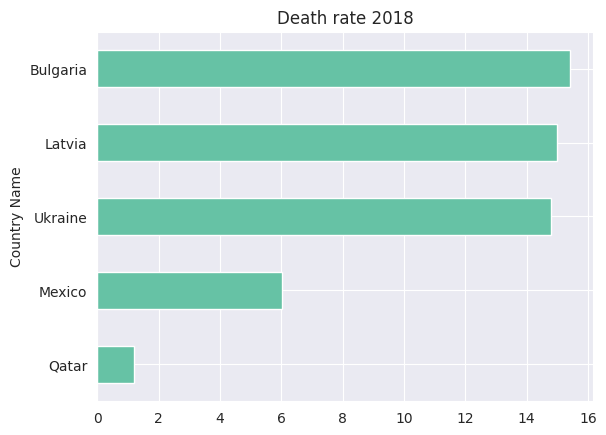

In [137]:
sns.set_palette('Set2')
sns.set_style('darkgrid')
death5.sort_values(ascending=True, inplace=True)
death5.plot(kind='barh',title='Death rate 2018')


Con el documento de **birth** para realizar un análisis de la tasa de natalidad en el 2018. Visualizar los resultados en un gráfico circular usando Matplotlib:

In [141]:
#birth.dropna(axis=0,subset=['2018'],inplace=True)

Text(0.5, 1.0, 'Number of countries')

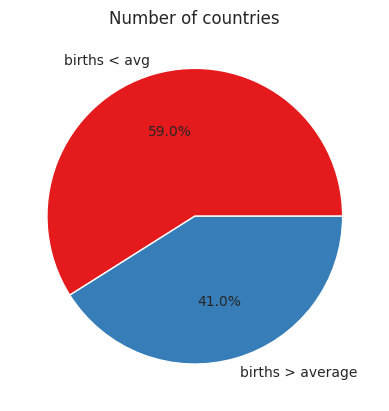

In [145]:

sns.set_palette("Set1")
birth.dropna(axis=0,subset=['2018'],inplace=True)
below_avg = len(birth[birth['2018'] < birth['2018'].mean()])
count = [below_avg, len(birth['2018']) - below_avg]
plt.pie(count,labels=['births < avg','births > average'],autopct='%1.1f%%')
plt.title('Number of countries')